In [1]:
#Rishikesh Suryavanshi
#PICT
#1-05-2023

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import scipy.misc

In [2]:
#Importing Data

mcd1 = pd.read_csv("mcdonalds.csv")

In [3]:
mcd1.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
mcd1.shape

(1453, 15)

In [5]:
mcd1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
#Transforming

columns = mcd1.columns
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in columns:
    if col != 'Age':
    mcd1[col] = label.fit_transform(mcd1[col])

In [7]:
mcd1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1


In [8]:
#Calculating and Printing Summary

from sklearn.decomposition import PCA

# convert 'Yes' and 'No' to 1 and 0 respectively in the first 11 columns
MD_x = mcd1.iloc[:, :11].replace({'Yes': 1, 'No': 0}).values

# perform PCA
MD_pca = PCA().fit(MD_x)

# print summary
summary_df = pd.DataFrame({
    'Standard deviation': np.sqrt(MD_pca.explained_variance_),
    'Proportion of Variance': MD_pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)
})
print(summary_df)

    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000


In [9]:
type(MD_x)

numpy.ndarray

Text(0, 0.5, 'Number of Persons')

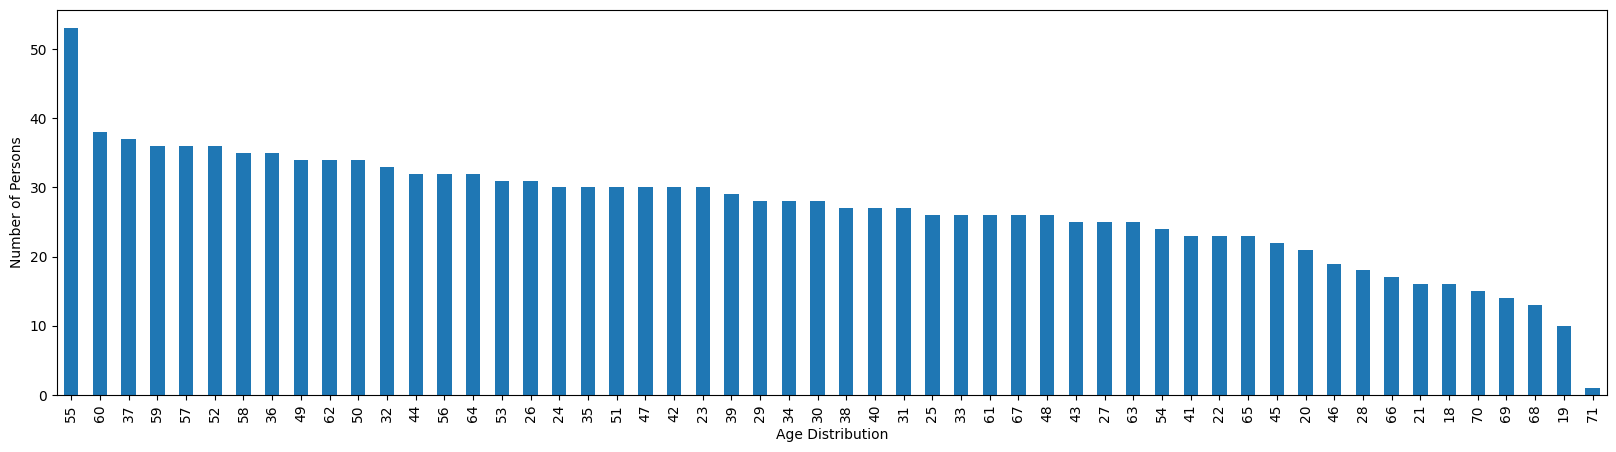

In [10]:
#Age Distribution vs Number of Persons

plt.figure(figsize=(20,5))
mcd1.Age.value_counts().plot(kind='bar')
plt.xlabel('Age Distribution')
plt.ylabel('Number of Persons')

array([[<AxesSubplot: title={'center': 'yummy'}>,
        <AxesSubplot: title={'center': 'convenient'}>,
        <AxesSubplot: title={'center': 'spicy'}>,
        <AxesSubplot: title={'center': 'fattening'}>],
       [<AxesSubplot: title={'center': 'greasy'}>,
        <AxesSubplot: title={'center': 'fast'}>,
        <AxesSubplot: title={'center': 'cheap'}>,
        <AxesSubplot: title={'center': 'tasty'}>],
       [<AxesSubplot: title={'center': 'expensive'}>,
        <AxesSubplot: title={'center': 'healthy'}>,
        <AxesSubplot: title={'center': 'disgusting'}>,
        <AxesSubplot: title={'center': 'Like'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'VisitFrequency'}>,
        <AxesSubplot: title={'center': 'Gender'}>, <AxesSubplot: >]],
      dtype=object)

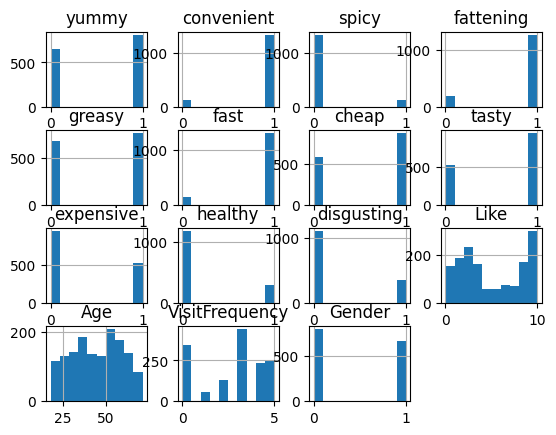

In [12]:
mcd1.hist()

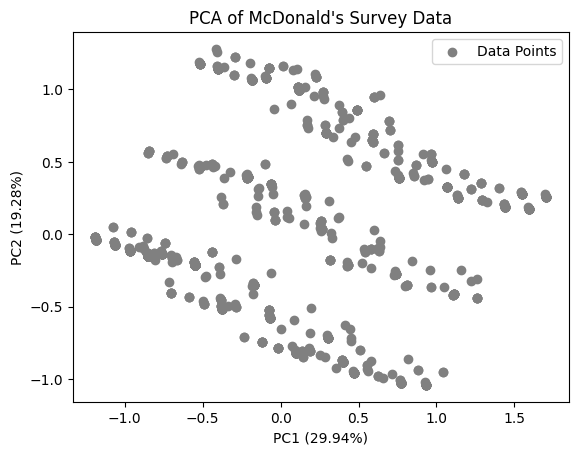

In [13]:
#Performing Principle Component Analysis

import matplotlib.pyplot as plt

# predict and project PCA
pca = PCA().fit(MD_x)
pca_proj = pca.transform(MD_x)

# plot PCA
plt.scatter(pca_proj[:, 0], pca_proj[:, 1], c='grey')
plt.xlabel('PC1 ({:.2%})'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC2 ({:.2%})'.format(pca.explained_variance_ratio_[1]))
plt.title('PCA of McDonald\'s Survey Data')

# add legend
plt.legend(['Data Points'])
plt.show()

In [14]:
#Using KMeans Clustering

from sklearn.cluster import KMeans

np.random.seed(1234)

MD_kmeans = KMeans(n_clusters=8, n_init=10, random_state=1234).fit(MD_x)

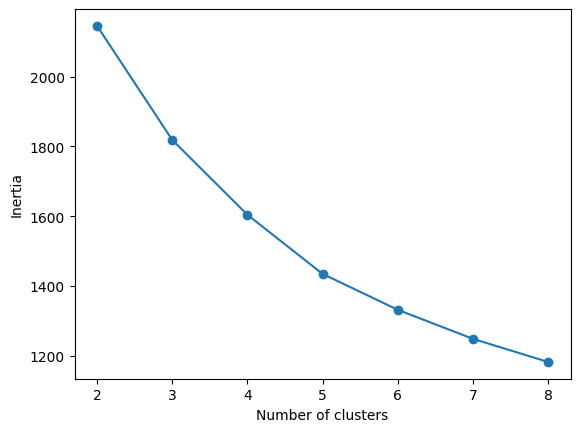

In [15]:
# Obtain inertia values for each number of clusters
inertias = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

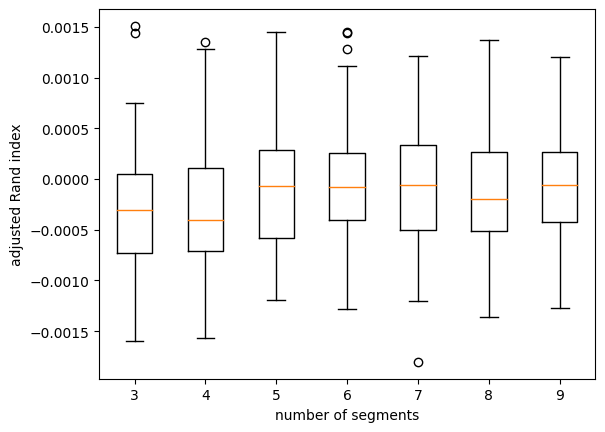

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

n_clusters = range(3, 10)
n_replicas = 10
n_bootstraps = 100

ARI = np.zeros((len(n_clusters), n_replicas, n_bootstraps))

for i, k in enumerate(n_clusters):
    for j in range(n_replicas):
        km = KMeans(n_clusters=k, n_init=1)
        km.fit(MD_x)
        for b in range(n_bootstraps):
            X_b = resample(MD_x)
            km_b = KMeans(n_clusters=k, n_init=1)
            km_b.fit(X_b)
            ARI[i, j, b] = adjusted_rand_score(km.labels_, km_b.labels_)

# get the median of the ARI values for each number of clusters
medians = np.median(ARI, axis=1)

# plot the medians as a boxplot
plt.boxplot(medians.T, positions=n_clusters)
plt.xlabel('number of segments')
plt.ylabel('adjusted Rand index')
plt.show()


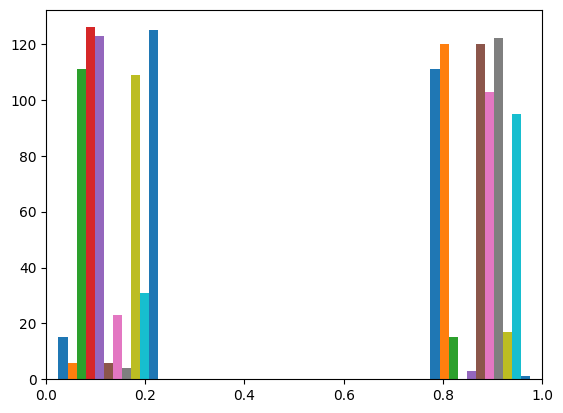

In [17]:
import matplotlib.pyplot as plt

# Extracting the data points in the fourth cluster
cluster4 = MD_kmeans.labels_ == 3
data_cluster4 = MD_x[cluster4, :]

# Plotting the histogram
plt.hist(data_cluster4, bins=4, range=(0, 1))
plt.xlim([0, 1])
plt.show()


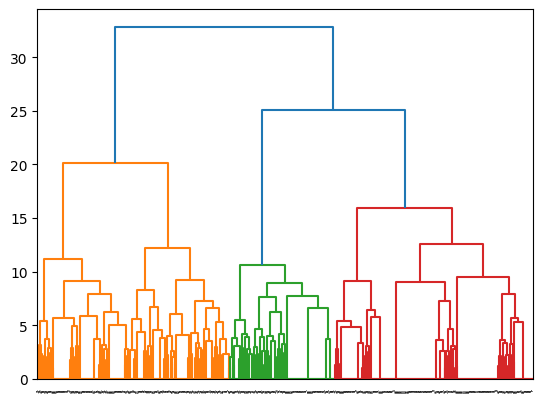

In [18]:
#Decision Tree Dendogram

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# compute the linkage matrix
Z = linkage(MD_x, method='ward')

# plot the dendrogram
dendrogram(Z, leaf_rotation=90, leaf_font_size=1)
plt.show()


In [20]:
mcdonalds['cluster_num'] = kmeans.labels_

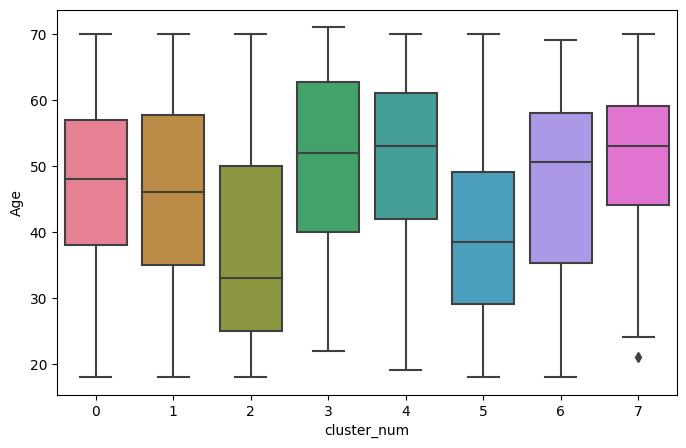

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster_num', y='Age', data=mcdonalds, palette='husl')
plt.show()

In [22]:
MD_k4 = MD_kmeans.labels_ == 3

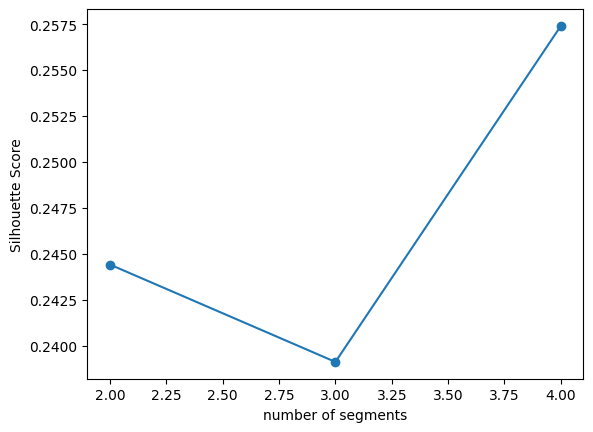

In [23]:
#Using Elbow Method

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

n_clusters = 4
km = KMeans(n_clusters=n_clusters, n_init=10)
km.fit(MD_x)
labels = km.labels_

scores = []
for i in range(2, n_clusters+1):
    km_i = KMeans(n_clusters=i, n_init=10)
    km_i.fit(MD_x)
    labels_i = km_i.labels_
    score = silhouette_score(MD_x, labels_i, metric='euclidean')
    scores.append(score)

plt.plot(range(2, n_clusters+1), scores, '-o')
plt.xlabel('number of segments')
plt.ylabel('Silhouette Score')
plt.show()

MD_r4 = km

In [26]:
crosstab = pd.crosstab(mcdonalds['cluster_num'], mcdonalds['Like'])